In [ ]:
# This takes forever, but it works.
install.packages('copula')
require(copula)

install.packages('psych')
require(psych)
install.packages('mvtnorm')
require(mvtnorm)
install.packages("MASS")
require(MASS)
install.packages('EnvStats')
require(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gsl’, ‘ADGofTest’, ‘stabledist’, ‘mvtnorm’, ‘pcaPP’, ‘pspline’, ‘numDeriv’


Warning message in install.packages("copula"):
“installation of package ‘gsl’ had non-zero exit status”
Warning message in install.packages("copula"):
“installation of package ‘copula’ had non-zero exit status”
Loading required package: copula

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘copula’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Loading required package: psych

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: mvtnorm

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS

Installing packa

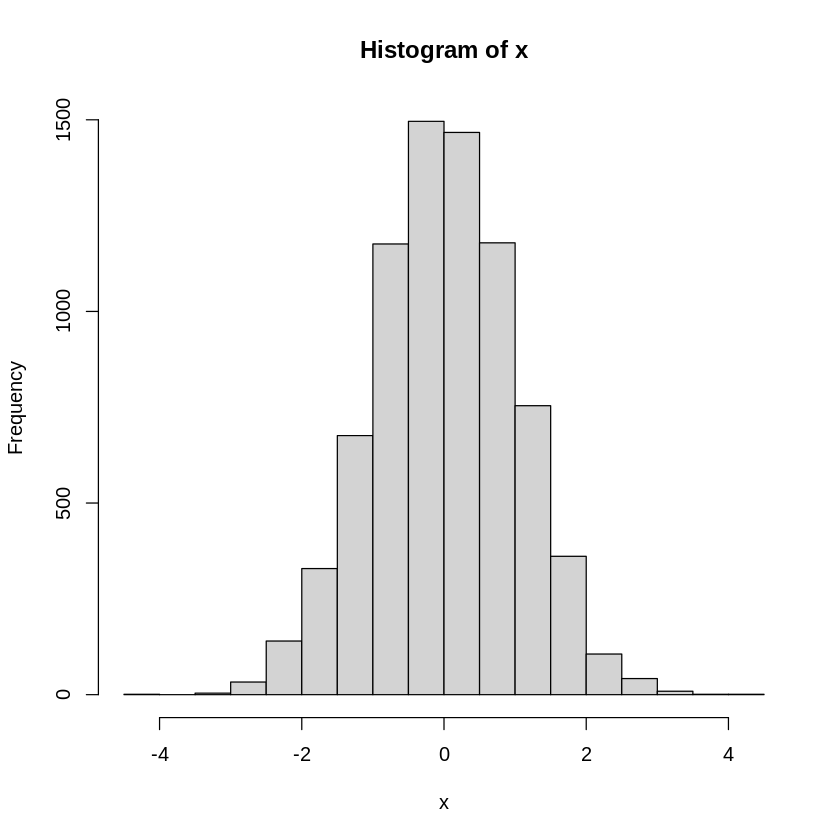

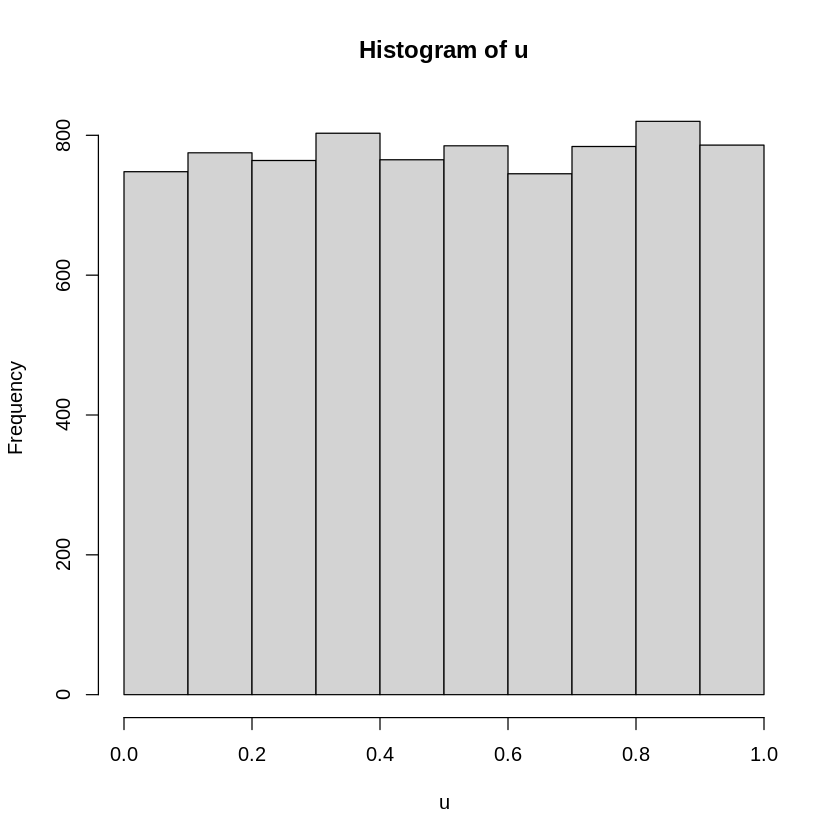

In [ ]:
x = rnorm(7775)
hist(x)
u = pnorm(x)
hist(u)

From [here](https://www.r-bloggers.com/2011/10/copulas-made-easy/) and [here](https://www.r-bloggers.com/2015/10/modelling-dependence-with-copulas-in-r/).

> The main appeal of copulas is that by using them you can model the correlation structure and the marginals (i.e. the distribution of each of your random variables) separately. This can be an advantage because for some combination of marginals there are no built-in functions to generate the desired multivariate distribution. For instance, in R it is easy to generate random samples from a multivariate normal distribution, however it is not so easy to do the same with say a distribution whose margins are Beta, Gamma and Student, respectively.

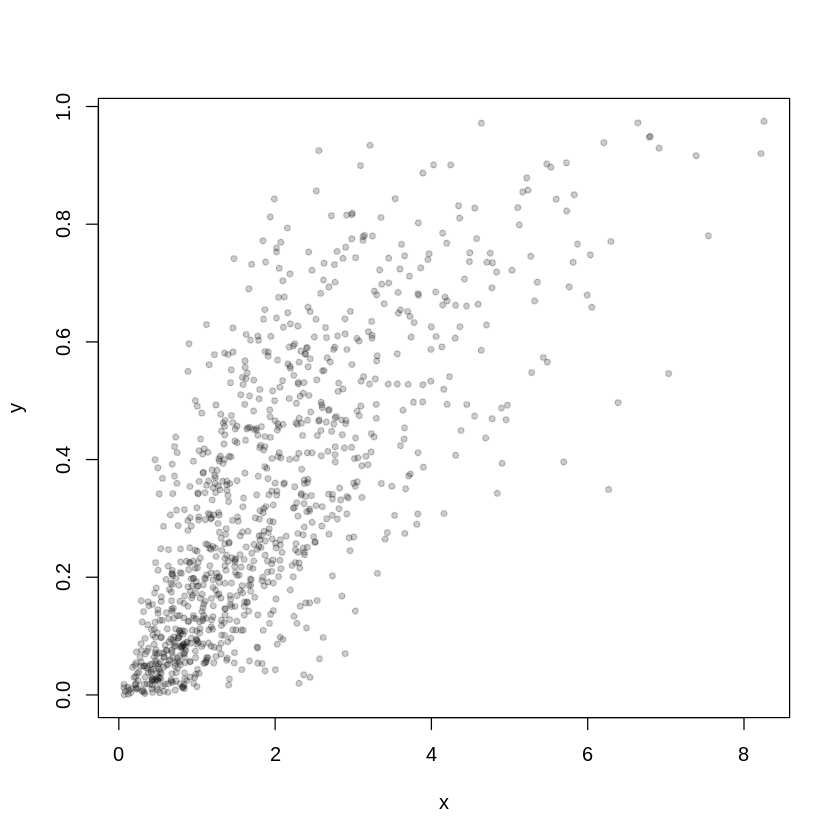

In [ ]:
S <- matrix(c(1,.8,.8,1),2,2) #Correlation matrix
AB <- rmvnorm(mean=c(0,0),sig=S,n=1000) #Our gaussian variables
U <- pnorm(AB) #Now U is uniform - check using hist(U[,1]) or hist(U[,2])
x <- qgamma(U[,1],2) #x is gamma distributed
y <- qbeta(U[,2],1,2) #y is beta distributed
plot(x,y, col=rgb(0,0,0,alpha=.2),pch=20) #They correlate!

In [ ]:
set.seed(100)

m <- 3
n <- 2000
sigma <- matrix(c(1, 0.4, 0.2,
                  0.4, 1, -0.8,
                  0.2, -0.8, 1),
                nrow=3)
z <- mvrnorm(n,mu=rep(0, m),Sigma=sigma,empirical=T)

1.0000000,0.3812244,0.1937548
0.3812244,1.0000000,-0.7890814
0.1937548,-0.7890814,1.0000000


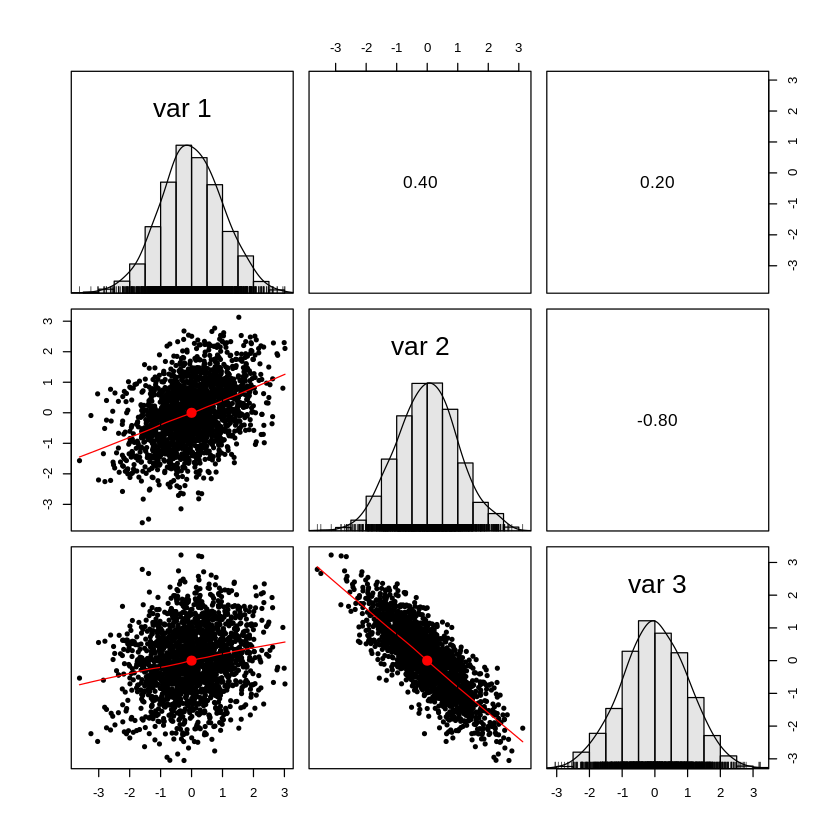

In [ ]:
cor(z,method='spearman')
pairs.panels(z, hist.col=rgb(0,0,0,0.1), cex=.3, pch=20)

If $(X)$ is a random variable with distribution $(F)$ then $(F(X))$ is uniformly distributed in the interval $[0, 1].$ In our toy example we already know the distribution $(F)$ for each of the three random variables.

Generating the uniform distributions:

0.3964091,0.9383800,0.02606379
0.5061062,0.3841268,0.63848276
0.8106957,0.1424839,0.94901119
0.2996585,0.1545577,0.76021608
0.5209528,0.3664756,0.67732434
0.6029822,0.1823926,0.83029287


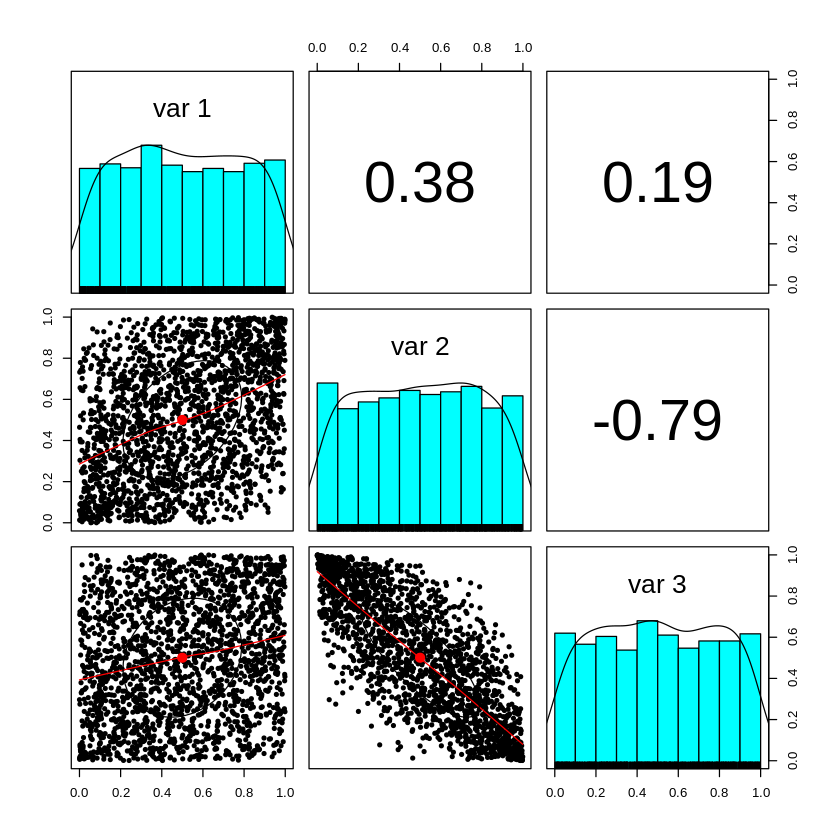

In [ ]:
u <- pnorm(z)
head(u)
pairs.panels(u)

Here is the pairplot of our new random variables contained in u. Note that each distribution is uniform in the [0,1] interval. Note also that the correlation the same, in fact, the transformation we applied did not change the correlation structure between the random variables. Basically we are left only with what is often referred as the dependence structure.

All is needed now is to select the marginals and apply them to u. Choosing Gamma, Beta and

---

Student distributed marginals:

In [ ]:
x1 <- qgamma(u[,1],shape=2,scale=1)
x2 <- qbeta(u[,2],2,2)
x3 <- qt(u[,3],df=5)

,x1,x2,x3
x1,1.0000000,0.3812244,0.1937548
x2,0.3812244,1.0000000,-0.7890814
x3,0.1937548,-0.7890814,1.0000000


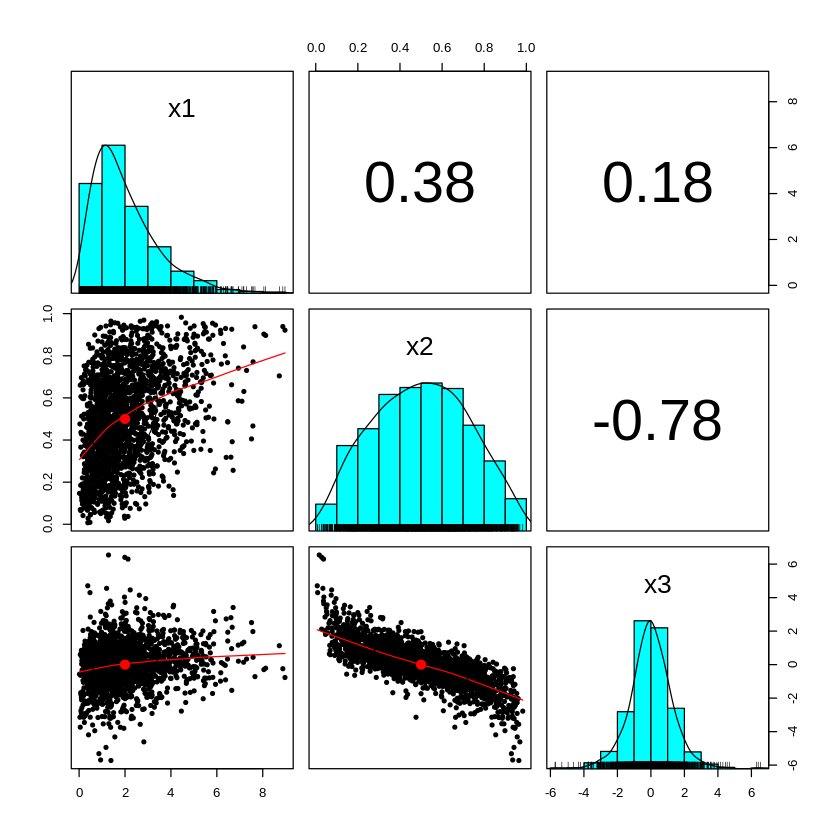

In [ ]:
df <- cbind(x1,x2,x3)
pairs.panels(df)
cor(df,meth='spearman')

,x1,x2,x3
x1,1.0000000,0.3812244,0.1937548
x2,0.3812244,1.0000000,-0.7890814
x3,0.1937548,-0.7890814,1.0000000


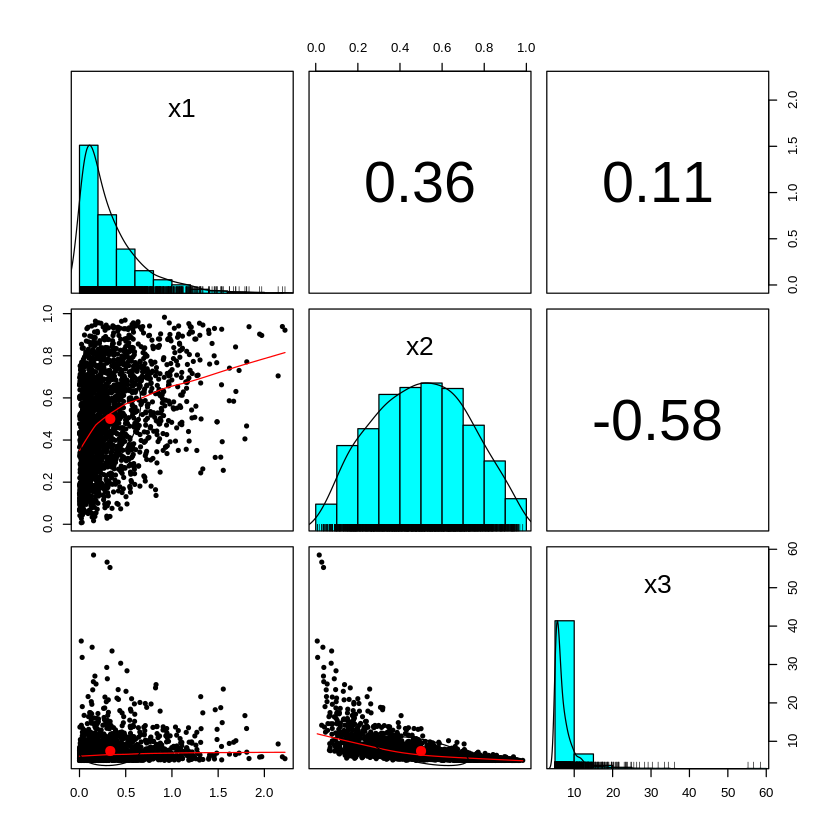

In [ ]:
x1 <- qexp(u[,1],3)
x2 <- qbeta(u[,2],2,2)
x3 <- qpareto(u[,3], 5, 3)

df <- cbind(x1,x2,x3)
pairs.panels(df)
cor(df,meth='spearman')

In [ ]:
install.packages('evir')
library('evir')
install.packages('quantmod')
library('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
getSymbols("CREE", from="2010-01-02", to="2021-01-06", src="yahoo", auto.assign = getOption('loadSymbols.auto.assign',TRUE))
cree.rtn=diff(log(`CREE`))
cree <- as.vector(-cree.rtn)
cree <- na.omit(cree)

getSymbols("GOOGL", from="2010-01-02", to="2021-01-06", src="yahoo", auto.assign = getOption('loadSymbols.auto.assign',TRUE))
google.rtn=diff(log(`GOOGL`))
google <- as.vector(-google.rtn)
google <- na.omit(google)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "CREE"

[1] "GOOGL"

[1] 0.2939924

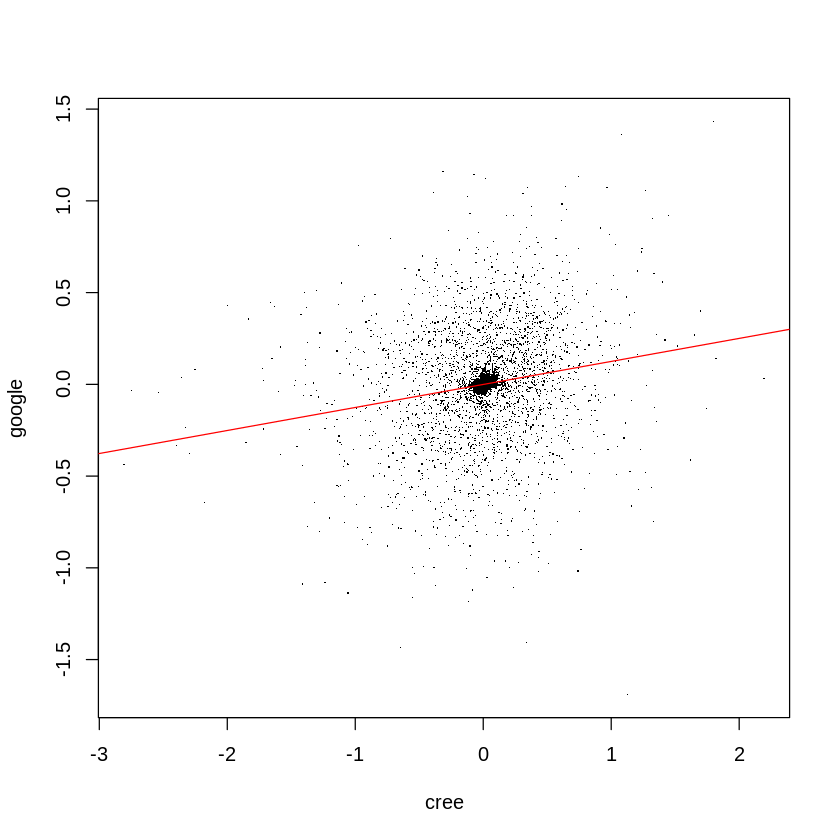

In [ ]:
plot(cree, google,pch='.')
abline(lm(google ~ cree), col='red', lwd=1)
cor(cree, google, method='spearman')

the `VineCopula` package offers a great function which tells us what copula we should use. Essentially the `VineCopula` library allows us to perform copula selection using BIC and AIC through the function `BiCopSelect()`:

In [ ]:
install.packages('VineCopula')
library(VineCopula)
u <- pobs(as.matrix(cbind(cree,google)))[,1]
v <- pobs(as.matrix(cbind(cree,google)))[,2]
selectedCopula <- BiCopSelect(u,v,familyset=NA)
selectedCopula

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Bivariate copula: t (par = 0.44, par2 = 2, tau = 0.29) 

In [ ]:
library(copula)

t.cop <- tCopula(dim=2)

m <- pobs(as.matrix(cbind(cree,google)))
fit <- fitCopula(t.cop, m, method='ml')
coef(fit)

ERROR: ignored